# Лабораторная работа № 2

In [2]:
import xlrd
import matplotlib.pyplot as plt
import math
from collections import Counter

book = xlrd.open_workbook('/home/dbulgakov/Work/terver/data/lab2/02_Автоаварии.xls')
sheet = book.sheet_by_index(0)

Задание 2

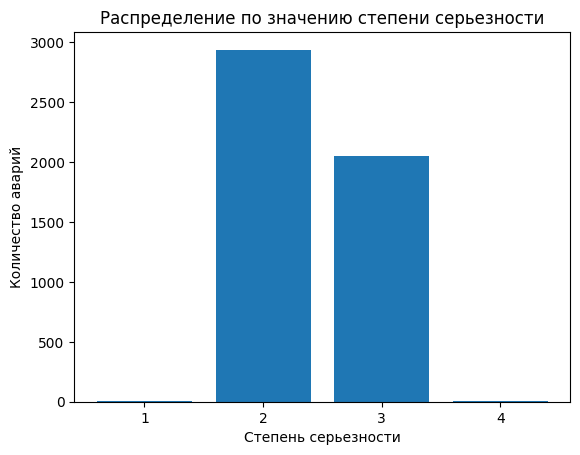

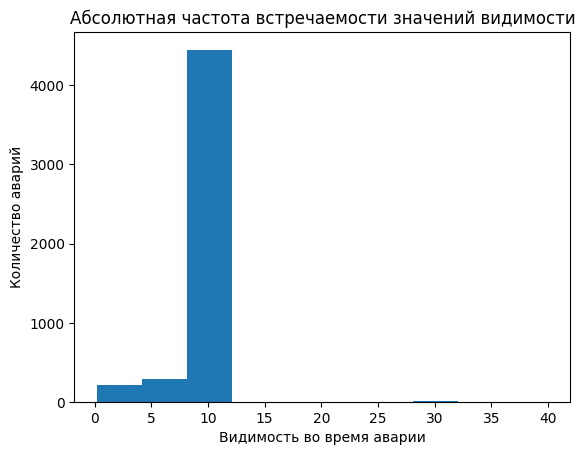

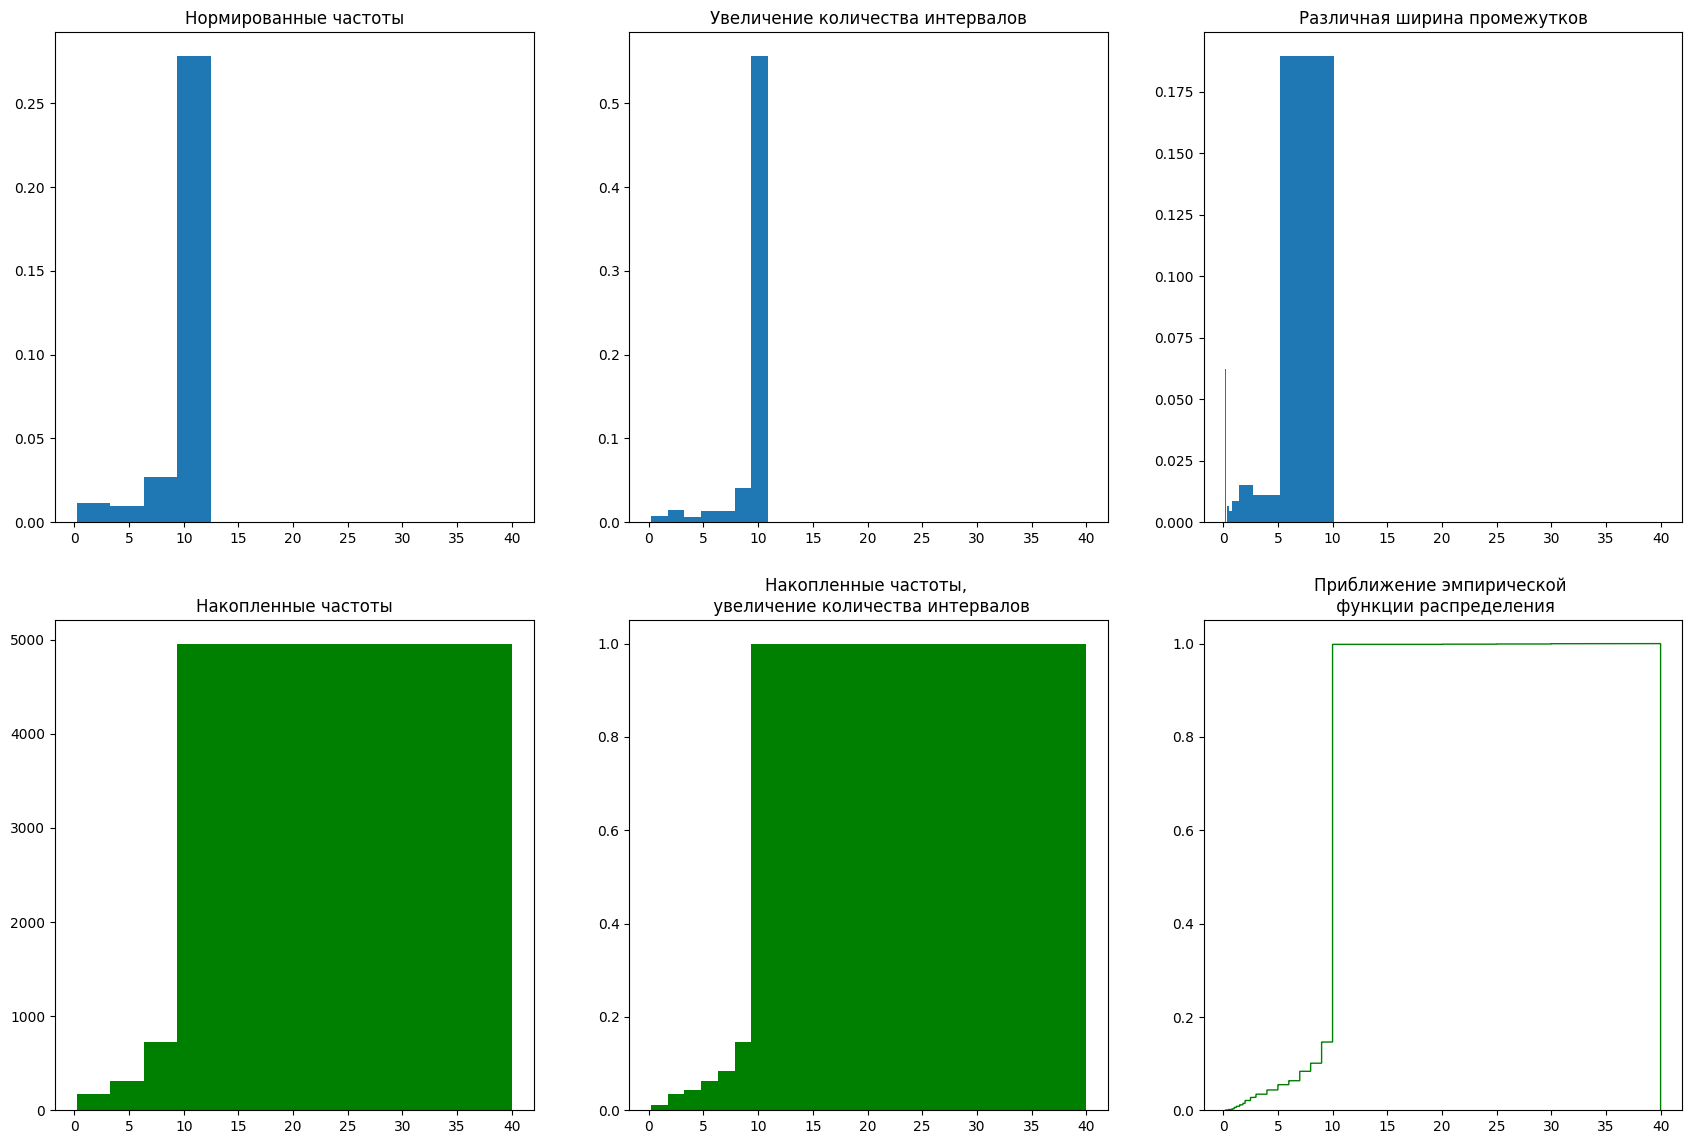

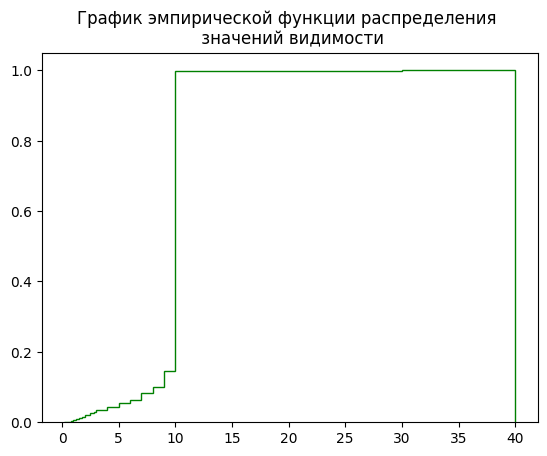

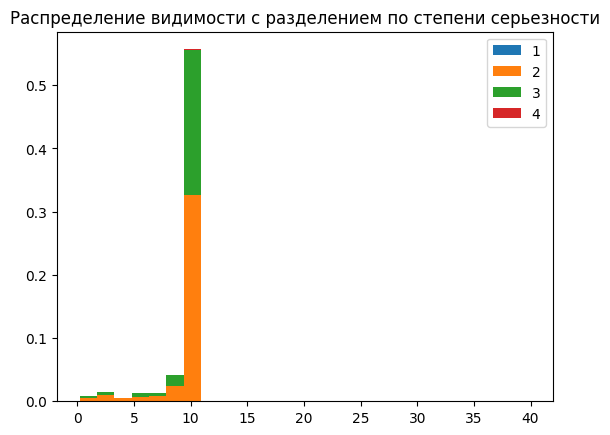

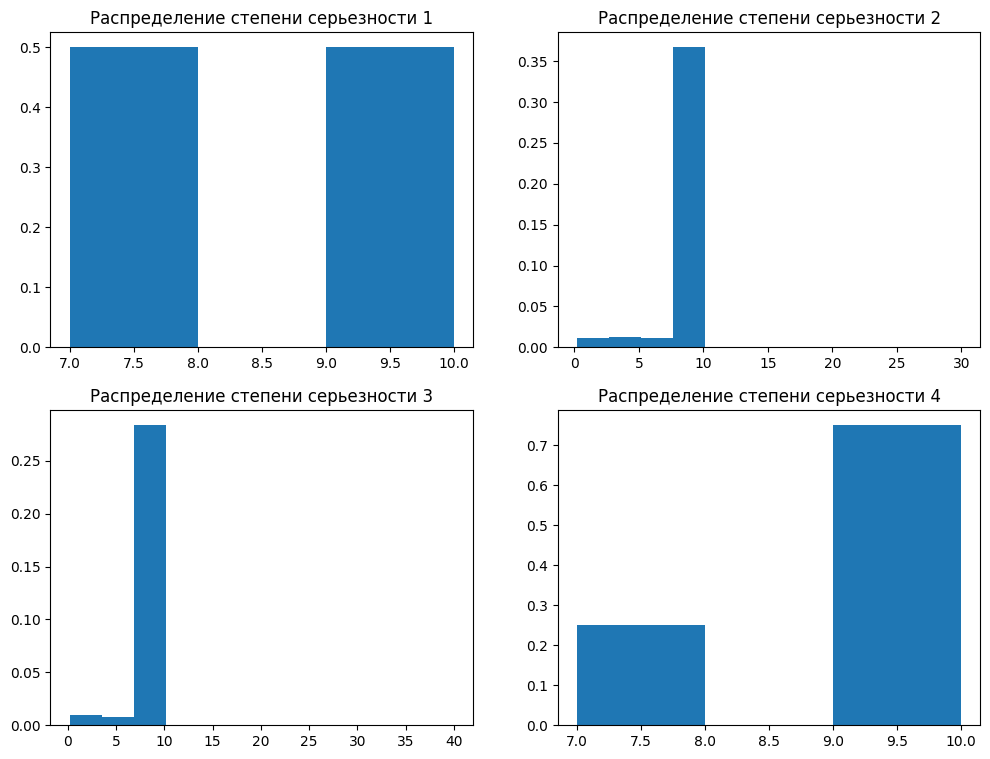

In [39]:
# Константы
VISIBILITY_COL = 18 
SEVERITY_COL = 3
ROW_OFFSET = 1
SHEET_SIZE = sheet.nrows - ROW_OFFSET

severity = sheet.col_values(SEVERITY_COL, ROW_OFFSET)
visibility = [float(value) for value in sheet.col_values(VISIBILITY_COL, ROW_OFFSET) if value.strip() != '']
visibility_on_severity = {}

for severity_item, visibility_item in zip(severity, visibility):
    if visibility_item == None: 
        continue
    if severity_item in visibility_on_severity:
        visibility_on_severity[severity_item].append(float(visibility_item))
    else:
        visibility_on_severity[severity_item] = [float(visibility_item)]

# График
severity_counter = Counter(severity)

severity_sorted = dict(sorted(severity_counter.items()))
plt.bar(severity_sorted.keys(), severity_sorted.values())
plt.xlabel("Степень серьезности")
plt.ylabel("Количество аварий")
plt.title("Распределение по значению степени серьезности")
plt.show()

# График
visibility.sort() # вариационный ряд
min_vis = visibility[0]
max_vis = visibility[-1]

visibility_counter = Counter(visibility)

x = plt.hist(visibility)
plt.xlabel("Видимость во время аварии")
plt.ylabel("Количество аварий")
plt.title("Абсолютная частота встречаемости значений видимости")
plt.show()

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (21, 14))

k = int(math.log(SHEET_SIZE, 2)) + 1
delta = (max_vis - min_vis) / k

axes[0][0].hist(visibility, bins = k, density = True)
axes[0][0].set_title("Нормированные частоты")

axes[0][1].hist(visibility, bins = 2 * k, density = True)
axes[0][1].set_title("Увеличение количества интервалов")

def exp_borders(min, max, n):
    bord = []
    bord.append(min)
    delta = (max - min) / (2 ** n - 1)
    for i in range(n):
        bord.append(bord[i] + delta)
        delta *= 2
    return bord

axes[0][2].hist(visibility, bins = exp_borders(min_vis, max_vis, k - 1), density = True)
axes[0][2].set_title("Различная ширина промежутков")

axes[1][0].hist(visibility, bins = k, color = 'green', cumulative = True)
axes[1][0].set_title("Накопленные частоты")

axes[1][1].hist(visibility, bins = 2*k, density = True, color = 'green', cumulative = True)
axes[1][1].set_title("Накопленные частоты, \n увеличение количества интервалов")

axes[1][2].hist(visibility, bins = SHEET_SIZE, density = True, cumulative = True, color = 'green', 
                histtype = 'step', fill = False)
axes[1][2].set_title("Приближение эмпирической \n функции распределения")
plt.show()

plt.hist(visibility, bins = list(visibility_counter.keys()), density = True, cumulative = True, color = 'green',
                histtype = 'step', fill = False)
plt.title("График эмпирической функции распределения \n значений видимости")
plt.show()

labels = ['1', '2', '3', '4']
plt.hist([visibility_on_severity['1'], visibility_on_severity['2'], visibility_on_severity['3'], visibility_on_severity['4']],
         bins = 2 * k, label = labels, density = True, histtype = 'bar', stacked = True)
plt.legend()
plt.title("Распределение видимости с разделением по степени серьезности")
plt.show()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))

axes[0][0].hist(visibility_on_severity['1'], bins = int(math.log(severity_counter['1'], 2)) + 1, density = True)
axes[0][0].set_title("Распределение степени серьезности 1")

axes[0][1].hist(visibility_on_severity['2'], bins = int(math.log(severity_counter['2'], 2)) + 1, density = True)
axes[0][1].set_title("Распределение степени серьезности 2")

axes[1][0].hist(visibility_on_severity['3'], bins = int(math.log(severity_counter['3'], 2)) + 1, density = True)
axes[1][0].set_title("Распределение степени серьезности 3")

axes[1][1].hist(visibility_on_severity['4'], bins = int(math.log(severity_counter['4'], 2)) + 1, density = True)
axes[1][1].set_title("Распределение степени серьезности 4")
plt.show()


Задание 3

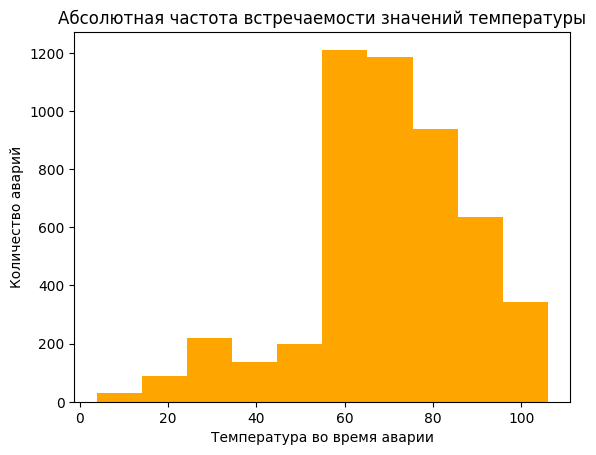

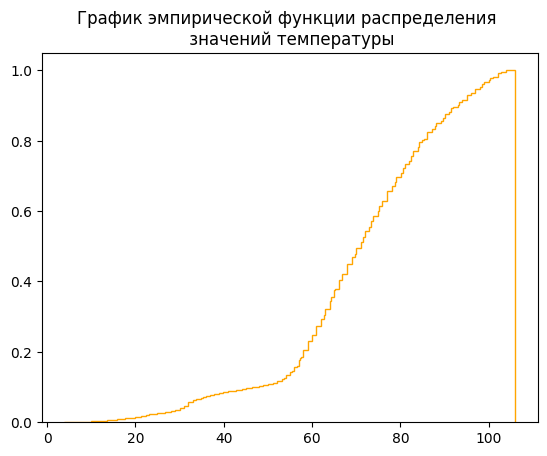

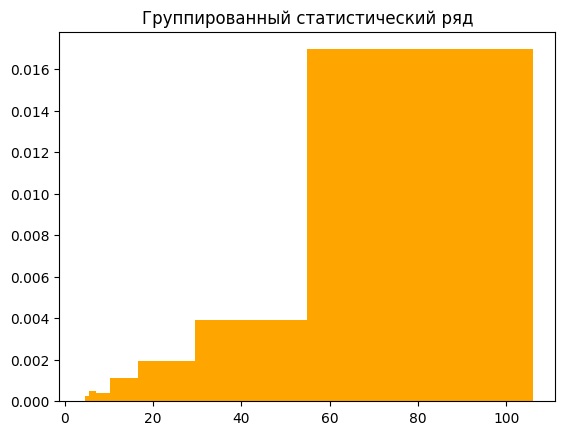

In [40]:
TEMPERATURE_COL = 14

temperature = [float(value) for value in sheet.col_values(TEMPERATURE_COL, ROW_OFFSET) if value.strip() != '']

temperature.sort() # вариационный ряд

temp_stat_series = Counter(temperature) # статистический ряд

plt.hist(temperature, color = 'orange')
plt.xlabel("Температура во время аварии")
plt.ylabel("Количество аварий")
plt.title("Абсолютная частота встречаемости значений температуры")
plt.show()

plt.hist(temperature, bins = list(temp_stat_series.keys()), density = True, cumulative = True, color = 'orange',
                histtype = 'step', fill = False)
plt.title("График эмпирической функции распределения \n значений температуры")
plt.show()

min_temp = temperature[0]
max_temp = temperature[-1]

k = int(math.log(SHEET_SIZE, 2)) + 1
delta = (max_temp - min_temp) / k

plt.hist(temperature, bins = exp_borders(min_temp, max_temp, k - 1), density = True, color = 'orange')
plt.title("Группированный статистический ряд")
plt.show()

Задание 4

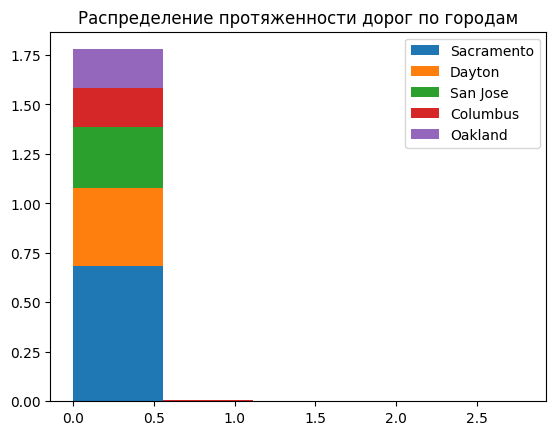

Counter({0.0: 555})
{0.0: 88, 0.01: 232, 0.94: 1}
Counter({0.0: 251})


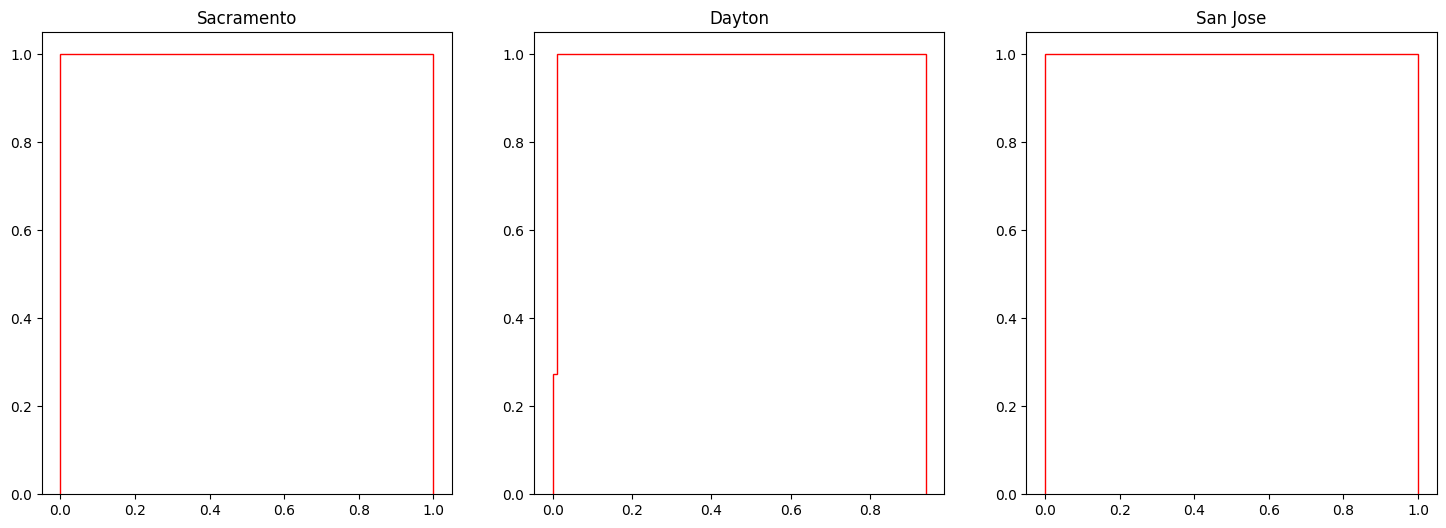

{0.0: 13, 0.01: 146, 0.48: 1, 0.71: 1, 0.94: 3, 1.09: 1, 1.28: 1, 1.65: 1, 1.67: 1, 2.04: 1, 2.79: 1}
Counter({0.0: 158})


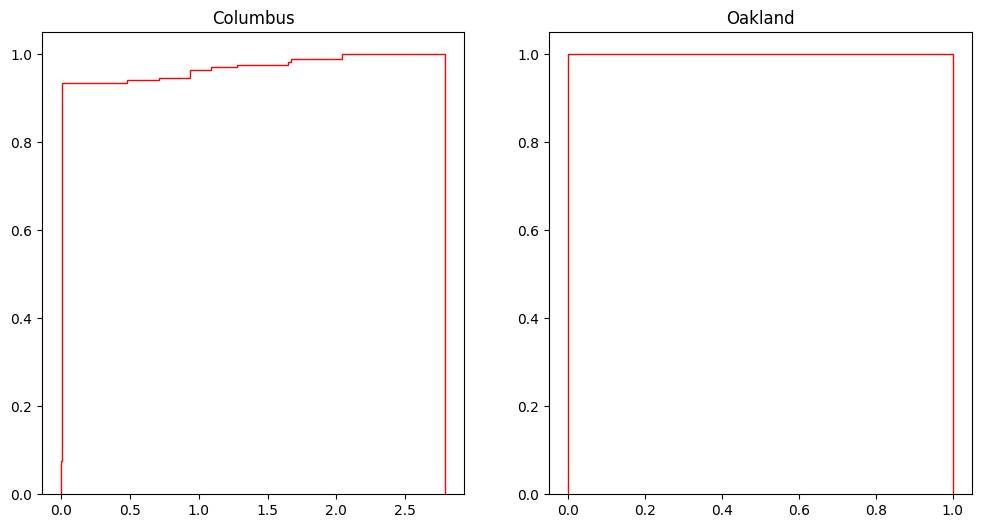

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [45]:
CITY_COL = 10
ROAD_COL = 6

cities = []
roads = []
roads_dict = {}

cities = sheet.col_values(CITY_COL, ROW_OFFSET)
roads = [float(value) for value in sheet.col_values(ROAD_COL, ROW_OFFSET) if value.strip() != '']
roads_dict = {}

for city_item, road_item in zip(cities, roads):
    if city_item in roads_dict:
        roads_dict[city_item].append(float(road_item))
    else:
        roads_dict[city_item] = [float(road_item)]

cities_count = Counter(cities) # количество аварий в городах
roads_count = Counter(roads) # количество разных протяженностей дорог

def secondInPair(x):
    (a, b) = x
    return b

cities_sorted = sorted(cities_count.items(), key = secondInPair)

cities_max = [] # список из 5 городов с наибольшим количеством аварий
for i in range(1, 6):
    cities_max.append(cities_sorted[-i][0]) 
    
labels = cities_max
plt.hist([roads_dict[cities_max[0]], roads_dict[cities_max[1]], roads_dict[cities_max[2]], roads_dict[cities_max[3]],
          roads_dict[cities_max[4]]], bins = len(cities_max), label = labels, density = True, histtype = 'bar',
          stacked = True)
plt.legend()
plt.title("Распределение протяженности дорог по городам")
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))

stat_series_0 = Counter(roads_dict[cities_max[0]])
print(stat_series_0)
axes[0].hist(roads_dict[cities_max[0]], bins = [0.0, 1.0], density = True, cumulative = True, color = 'red',
                histtype = 'step', fill = False)
axes[0].set_title(cities_max[0])

stat_series_1 = Counter(roads_dict[cities_max[1]])
stat_series_1_sort = dict(sorted(stat_series_1.items()))
print(stat_series_1_sort)
axes[1].hist(roads_dict[cities_max[1]], bins = list(stat_series_1_sort.keys()), density = True, cumulative = True, color = 'red',
                histtype = 'step', fill = False)
axes[1].set_title(cities_max[1])

stat_series_2 = Counter(roads_dict[cities_max[2]])
print(stat_series_2)
axes[2].hist(roads_dict[cities_max[2]], bins = [0.0, 1.0], density = True, cumulative = True, color = 'red',
                histtype = 'step', fill = False)
axes[2].set_title(cities_max[2])
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

stat_series_3 = Counter(roads_dict[cities_max[3]])
stat_series_3_sort = dict(sorted(stat_series_3.items()))
print(stat_series_3_sort)
axes[0].hist(roads_dict[cities_max[3]], bins = list(stat_series_3_sort.keys()), density = True, cumulative = True, color = 'red',
                histtype = 'step', fill = False)
axes[0].set_title(cities_max[3])

stat_series_4 = Counter(roads_dict[cities_max[4]])
print(stat_series_4)
axes[1].hist(roads_dict[cities_max[4]], bins = [0.0, 1.0], range = (0.0, 1.0),  density = True, cumulative = True, color = 'red',
                histtype = 'step', fill = False)
axes[1].set_title(cities_max[4])
plt.show()
print(roads_dict[cities_max[4]])